In [26]:
import pandas as pd
df=pd.read_csv('D:\Machine Learning\Data\heart_disease.csv')
df

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ZONE\AppData\Local\Temp\ipykernel_2808\2159496471.py:2: SyntaxWarning: invalid escape sequence '\M'
  df=pd.read_csv('D:\Machine Learning\Data\heart_disease.csv')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [27]:
# Training

from sklearn.model_selection import train_test_split

X, y= df.drop('target', axis=1), df['target']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.4, random_state=9)

## Scale-Insensitive


In [28]:
# Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

forest= RandomForestClassifier(random_state=9)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=9)

In [29]:
# Naive Bayes classifier

from sklearn.naive_bayes import GaussianNB

nb_clf= GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB()

In [30]:
# Gradien Boosting classifier

from sklearn.ensemble import GradientBoostingClassifier

gb_clf= GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier()

## Scale-Sensitive

In [31]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [32]:
# K-neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [33]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

log= LogisticRegression()
log.fit(X_train_scaled,y_train)

LogisticRegression()

In [34]:
# Support Vector Classifier

from sklearn.svm import SVC

svc= SVC()
svc.fit(X_train_scaled,y_train)

SVC()

## Accuracy

In [35]:
forest.score(X_test,y_test)

0.9853658536585366

In [36]:
nb_clf.score(X_test,y_test)

0.8463414634146341

In [37]:
gb_clf.score(X_test,y_test)

0.9707317073170731

In [38]:
knn.score(X_test_scaled,y_test)

0.8536585365853658

In [39]:
log.score(X_test_scaled,y_test)

0.8731707317073171

In [40]:
svc.score(X_test_scaled,y_test)

0.9341463414634147

## Recall Score

In [41]:
from sklearn.metrics import recall_score

# Unscaled

y_pred= forest.predict(X_test)
print('Forest:', recall_score(y_test,y_pred))

y_pred= nb_clf.predict(X_test)
print('Naive-Bayes:', recall_score(y_test,y_pred))

y_pred= gb_clf.predict(X_test)
print('Gradient-Boosting:', recall_score(y_test,y_pred))


Forest: 0.9859154929577465
Naive-Bayes: 0.9014084507042254
Gradient-Boosting: 0.9859154929577465


In [42]:
# Scaled

y_pred= knn.predict(X_test_scaled)
print('K-neighbours:', recall_score(y_test,y_pred))

y_pred= log.predict(X_test_scaled)
print('Logistic:', recall_score(y_test,y_pred))

y_pred= svc.predict(X_test_scaled)
print('Support-vector:', recall_score(y_test,y_pred))

K-neighbours: 0.8732394366197183
Logistic: 0.92018779342723
Support-vector: 0.9530516431924883


## Roc Curve

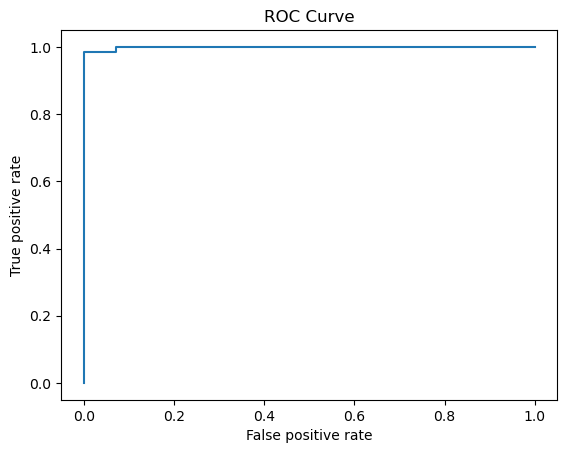

In [48]:
# Random Forest

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_prob= forest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

In [47]:
roc_auc_score(y_test,y_prob)

0.9989990705655251

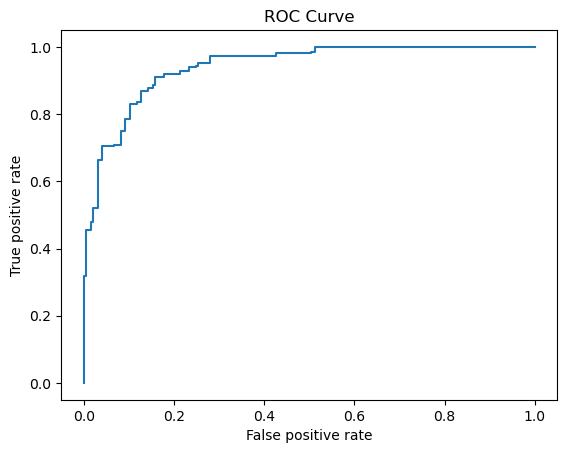

In [54]:
# Logistic Regression

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_prob= log.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

In [56]:
roc_auc_score(y_test,y_prob)

0.9411596482447988

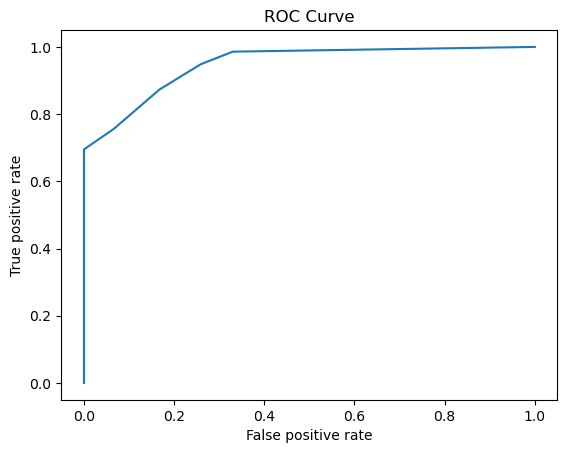

In [61]:
# K-Neighbors

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_prob= knn.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

In [62]:
roc_auc_score(y_test,y_prob)

0.9478444269678987

## Hyper parameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid= {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

forest= RandomForestClassifier(n_jobs=-1, random_state=9)

grid_search= GridSearchCV(forest, param_grid, cv=3, n_jobs=-1, verbose=2)

In [65]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [76]:
# Best model

best_forest= grid_search.best_estimator_
best_forest

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=9)

### Validating the best model

In [77]:
# Comparing the best forest model

best_forest.score(X_test,y_test)

0.9853658536585366

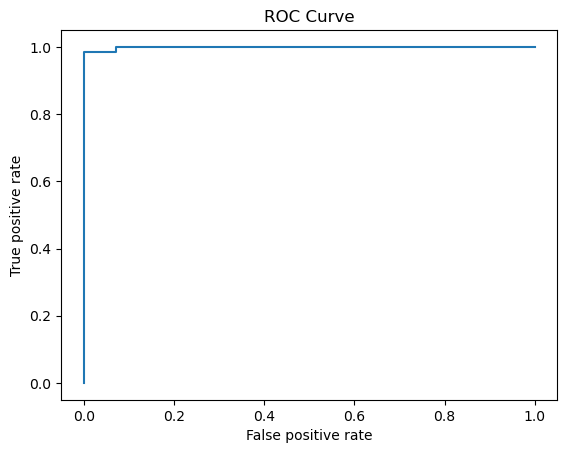

In [78]:
# ROC Curve

y_prob= best_forest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()


In [79]:
# Recall score

y_pred= best_forest.predict(X_test)
print('Best Forest:', recall_score(y_test,y_pred))


Best Forest: 0.9859154929577465


### Feature Importances

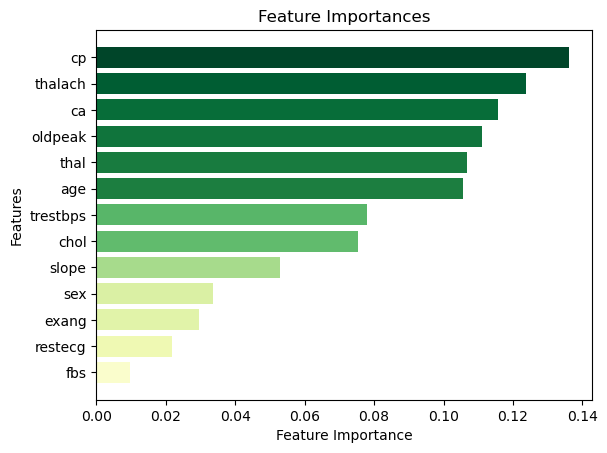

In [69]:
import numpy as np

features_importances= best_forest.feature_importances_
features= best_forest.feature_names_in_

sorted_idx= np.argsort(features_importances)
sorted_features= features[sorted_idx]
sorted_importances= features_importances[sorted_idx]

colors= plt.cm.YlGn(sorted_importances/ max(sorted_importances))

plt.barh( sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

<Axes: >

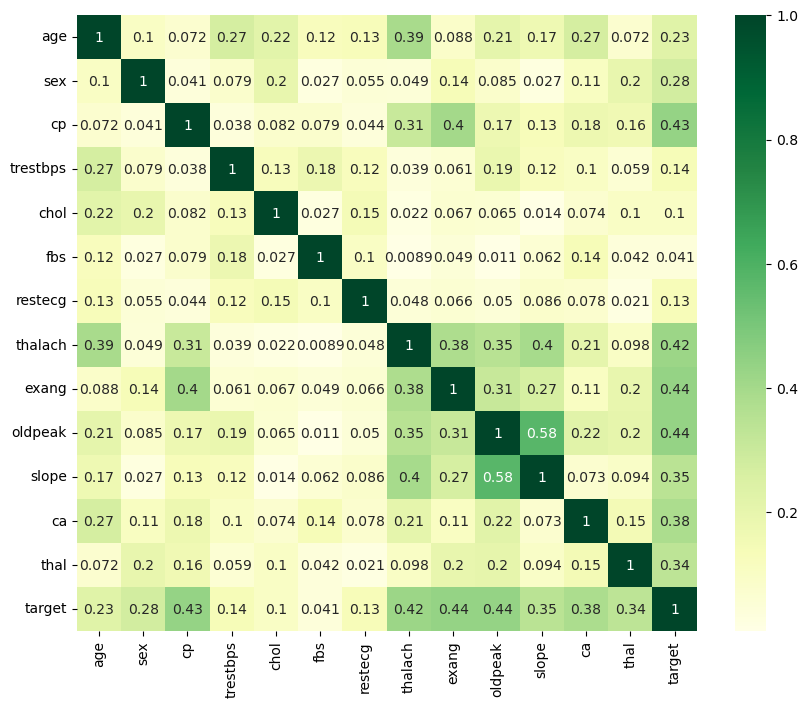

In [73]:
# Correlation of features

import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(abs(df.corr()), annot=True, cmap='YlGn')

In [80]:
# Now we make use of the best model to predict/ predict probability